In [1]:
train_path = 'data/train.json'
dev_path = 'data/dev.json'

In [2]:
import json

def read_file(path):
    data_X = []
    data_Y = []
    with open(path, 'r') as data_file:
        line = data_file.readline()
        while line:
            data = json.loads(line)
            data_X.append(data['review'])
            data_Y.append(data['ratings'])
            line = data_file.readline()
    return data_X,data_Y

In [3]:
X_train,Y_train = read_file(train_path)
X_dev,Y_dev = read_file(dev_path)

In [4]:
import string
from nltk import wordpunct_tokenize

translator = str.maketrans(string.punctuation, ' '*len(string.punctuation)) #map punctuation to space

def tokenize(sentence):
    removed_puncts = sentence.translate(translator)
    return wordpunct_tokenize(removed_puncts)

In [10]:
from nltk.corpus import stopwords

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.ensemble import RandomForestClassifier

model = Pipeline([('pp_vec', TfidfVectorizer(strip_accents='ascii',
                                             lowercase=True,
                                             tokenizer=tokenize,
                                             stop_words=stopwords.words('english'),
                                             ngram_range=(1,1),
#                                              binary=True
#                                              norm='l1',
                                             norm='l2',
#                                              norm=None,
                                             analyzer='word')),
#                      ('rand_forest', RandomForestClassifier(verbose=True,
#                                                             n_jobs=3)),])
#                      ('sgd', SGDClassifier(loss='modified_huber',
#                                            penalty='elasticnet',
#                                            penalty='l2',
#                                            learning_rate='optimal',
#                                            class_weight='balanced',
#                                            n_jobs=3,
#                                            verbose=True))])
#                      ('multNB', MultinomialNB())])
                  ('lin_reg', LogisticRegression(verbose=1,multi_class='multinomial',solver='saga',n_jobs=3,class_weight='balanced'))])

In [11]:
model.fit(X_train, Y_train)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.


convergence after 47 epochs took 239 seconds


[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:  4.0min finished


Pipeline(memory=None,
     steps=[('pp_vec', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True...2',
          random_state=None, solver='saga', tol=0.0001, verbose=1,
          warm_start=False))])

In [12]:
predicted = model.predict(X_dev)

In [29]:
from sklearn.metrics import f1_score
f1_score(Y_dev, predicted, average='weighted')  

0.2686300573016148

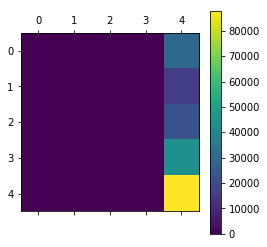

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

m=confusion_matrix(Y_dev,predicted)

plt.matshow(m)
plt.colorbar()